<a href="https://colab.research.google.com/github/euguroglu/Machine-Learning-Projects/blob/master/Linear_Regression_Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

## Importing Data and Data Exploration

In [5]:
df = pd.read_csv('USA_Housing.csv')

In [6]:
df.head()

Avg. Area Income  ...                                            Address
0      79545.458574  ...  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...
1      79248.642455  ...  188 Johnson Views Suite 079\nLake Kathleen, CA...
2      61287.067179  ...  9127 Elizabeth Stravenue\nDanieltown, WI 06482...
3      63345.240046  ...                          USS Barnett\nFPO AP 44820
4      59982.197226  ...                         USNS Raymond\nFPO AE 09386

[5 rows x 7 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
df.describe()

Avg. Area Income  Avg. Area House Age  ...  Area Population         Price
count       5000.000000          5000.000000  ...      5000.000000  5.000000e+03
mean       68583.108984             5.977222  ...     36163.516039  1.232073e+06
std        10657.991214             0.991456  ...      9925.650114  3.531176e+05
min        17796.631190             2.644304  ...       172.610686  1.593866e+04
25%        61480.562388             5.322283  ...     29403.928702  9.975771e+05
50%        68804.286404             5.970429  ...     36199.406689  1.232669e+06
75%        75783.338666             6.650808  ...     42861.290769  1.471210e+06
max       107701.748378             9.519088  ...     69621.713378  2.469066e+06

[8 rows x 6 columns]

In [9]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

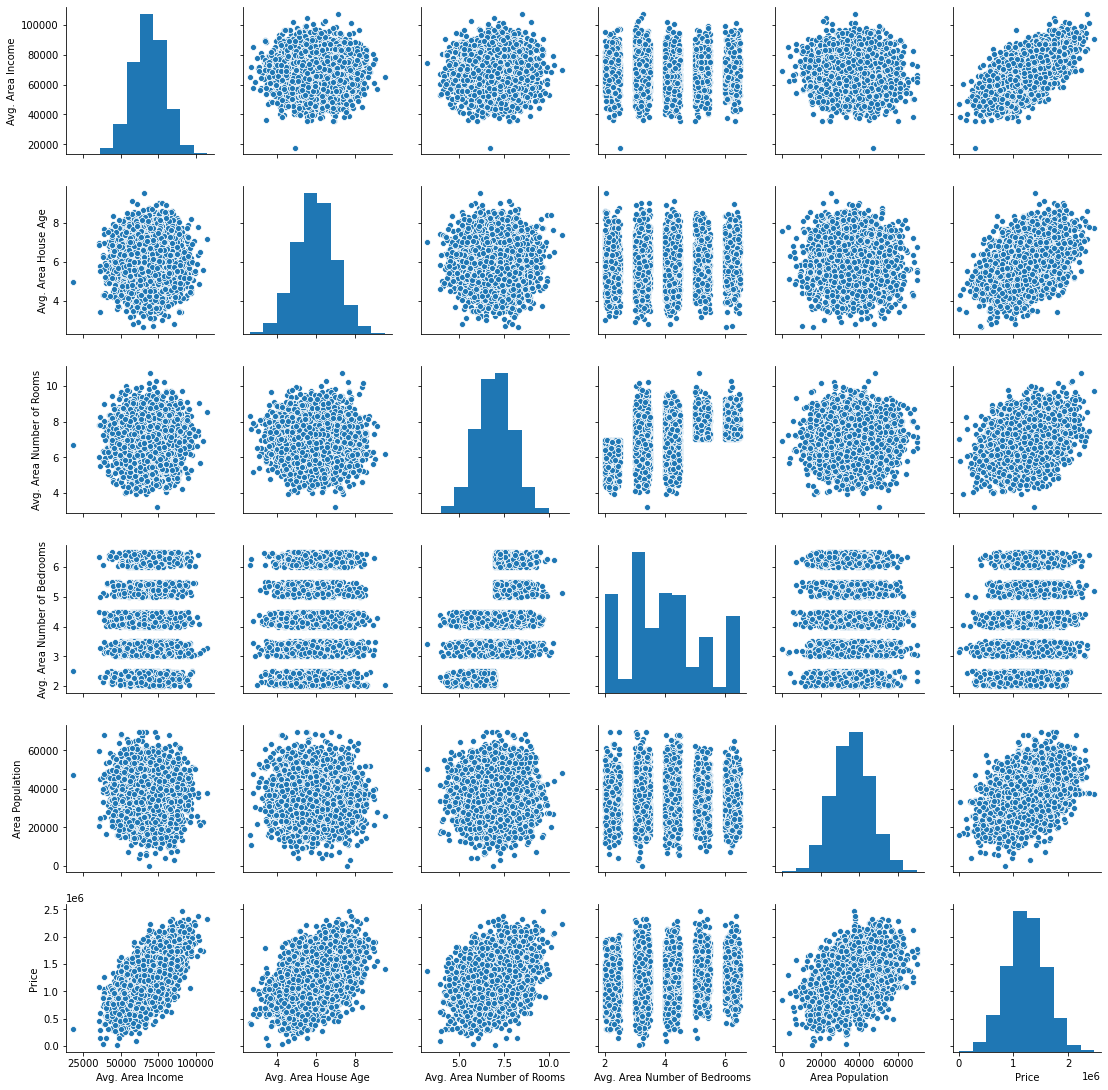

In [10]:
sns.pairplot(df)

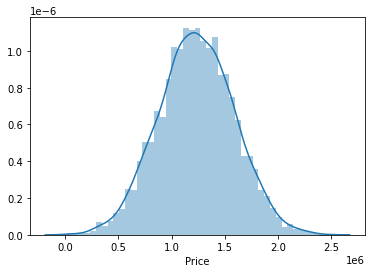

In [11]:
sns.distplot(df['Price'])

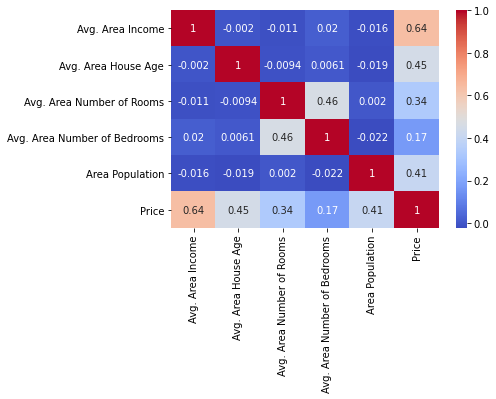

In [12]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

## Data Preperation

In [13]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [14]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [15]:
y = df['Price']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=101)

## Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm = LinearRegression()

In [23]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
print(lm.intercept_)

-2640159.796853739


## Observing coeefficient of features

In [25]:
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [26]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

Coeff
Avg. Area Income                  21.528276
Avg. Area House Age           164883.282027
Avg. Area Number of Rooms     122368.678027
Avg. Area Number of Bedrooms    2233.801864
Area Population                   15.150420

## Predictions

In [30]:
y_pred = lm.predict(X_test)

In [40]:
y_pred_train = lm.predict(X_train)

In [31]:
y_pred

array([1260960.70567629,  827588.75560301, 1742421.24254363, ...,
        372191.40626868, 1365217.15140901, 1914519.54178955])

Text(0.5, 1.0, 'Scatter Plot of House Prediction')

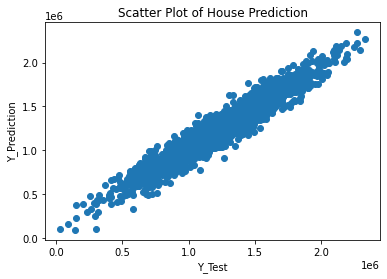

In [34]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y_Test')
plt.ylabel('Y_Prediction')
plt.title('Scatter Plot of House Prediction')

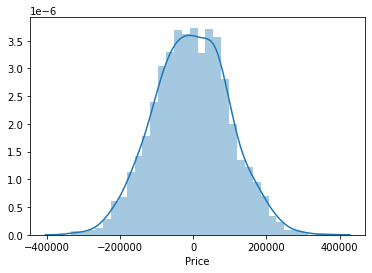

In [35]:
sns.distplot(y_test-predictions)

## Evaluation

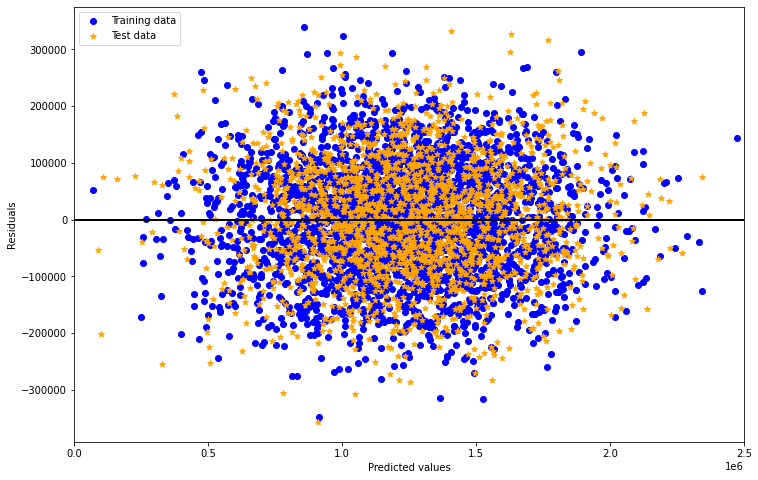

In [49]:
plt.figure(figsize=(12,8))
plt.scatter(y_pred_train, y_pred_train - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_pred, y_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=2500000, lw=2, color='k')
plt.xlim([0, 2500000])
plt.show()

In [36]:
from sklearn import metrics

Mean Absolute Error

In [37]:
metrics.mean_absolute_error(y_test,predictions)

82288.22251914928

Mean Squared Error

In [38]:
metrics.mean_squared_error(y_test,predictions)

10460958907.208244

Root Means Squared Error

In [39]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

102278.82922290538